In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

import konlpy
from konlpy.tag import Twitter, Okt

import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus

import pyLDAvis
import pyLDAvis.gensim
import pickle

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from os import path
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [34]:
#df = pd.read_csv('발라드_4841곡_240402.csv')
#df = pd.read_csv('알앤비_4927곡_240402.csv')
#df = pd.read_csv('인디_5000곡_240402.csv')
#df = pd.read_csv('kor_ballad.csv')
#df = pd.read_csv('kor_dance.csv')
#df = pd.read_csv('kor_indie.csv')
#df = pd.read_csv('kor_rnb.csv')
#df = pd.read_csv('kor_rock.csv')
df = pd.read_csv('kor_trot.csv')
print(len(df))
df.head()

4721


,Title,Likes,Singer,Lyrics
0,이제 나만 믿어요,"174,182",임영웅,무얼 믿은 걸까 부족했던 내게서\r\n나조차 못 믿던 내게 여태 머문 사람\r\n무...
1,"애인이 되어줄게요 (Prod. 알고보니, 혼수상태)","26,969",김호중,누가누가 당신 맘을 외롭게 합니까\r\n누가누가 당신 맘에 눈물을 주나요\r\n바람...
2,시절인연 (時節因緣),"33,540",이찬원,사람이 떠나간다고\r\n그대여 울지 마세요\r\n오고 감 때가 있으니\r\n미련일랑...
3,우산이 없어요,"31,282",김호중,저기 저 골목길은 우리가 함께 있던\r\n모든 게 그대론데 나는 변해 버렸네\r\n...
4,나만의 길 (My Way),"26,288",김호중,저 강물을 따라 흐르는 꽃잎들처럼\r\n어제 꿈에 보았던 곳 닿을 수만 있다면\r\...


In [35]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])
#file_name = 'song_ballad_text.txt'
#file_name = 'song_rnb_text.txt'
#file_name = 'song_indi_text.txt'
#file_name = 'kor_ballad_text.txt'
#file_name = 'kor_dance_text.txt'
#file_name = 'kor_indie_text.txt'
#file_name = 'kor_rnb_text.txt'
#file_name = 'kor_rock_text.txt'
file_name = 'kor_trot_text.txt'
with open(file_name, 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

4721
무얼 믿은 걸까 부족했던 내게서
나조차 못 믿던 내게 여태 머문 사람
무얼 봤던 걸까 가진 것도 없던 내게
무작정 내 손을 잡아 날 이끈 사람
최고였어
그대 눈 속에 비친 내 모습
이제는 내게서 그댈 비춰줄게
궂은 비가 오면
세상 가장 큰 그대 우산이 될게
그댄 편히 걸어가요
걷다가 지치면
내가 그대를 안고 어디든 갈게
이제 나만 믿어요
나만 두고 가던
나만 스쳐 간 행운이 모여
그대가 되어서 내게 와준 거야
궂은 비가 오면
세상 가장 큰 그대 우산이 될게
그댄 편히 걸어가요
걷다가 지치면
내가 그대를 안고 어디든 갈게
이제 나만 믿어요
나의 마지막 주인공이 되어
다신 누구 앞에서도
그대는 고개 숙이지 마요
내가 보지 못했던 홀로 고단했던 시간
고맙고 미안해요 사랑해요
이 세상은
우리를 두고 오랜 장난을 했고
우린 속지 않은 거야
이제 울지 마요
좋을 땐 밤새도록 맘껏 웃어요
전부 그대 꺼니까
그대는 걱정 말아요
이제 나만 믿어요


In [36]:
with open('kor_trot_text.txt', 'r', encoding = 'utf-8') as f:
    lyrics = f.read()
print(lyrics[:50])

무얼 믿은 걸까 부족했던 내게서

나조차 못 믿던 내게 여태 머문 사람

무얼 봤던 걸까 


In [37]:
okt = Okt()

stop_words = ['\n', '?', '.', ',', '!', '\r', "'"]
def normalize(lyric):
    nouns = okt.nouns(lyric)
    lyric_noun = [noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
    return lyric_noun

In [38]:
normalized_text = normalize(lyrics)

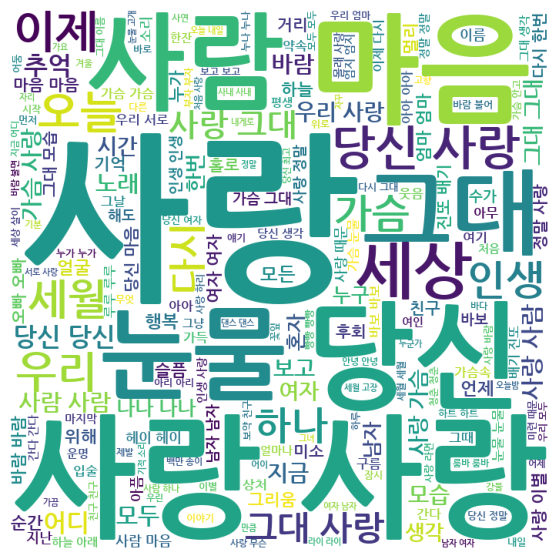

In [39]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/ballad_wc.png')
#wc.to_file('wc/rnb_wc.png')
#wc.to_file('wc/indi_wc.png')
#wc.to_file('wc/kor_ballad_wc.png')
#wc.to_file('wc/kor_dance_wc.png')
#wc.to_file('wc/kor_indie_wc.png')
#wc.to_file('wc/kor_rnb_wc.png')
#wc.to_file('wc/kor_rock_wc.png')
wc.to_file('wc/kor_trot_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [52]:
ballad = pd.read_csv('kor_ballad.csv')
dance = pd.read_csv('kor_dance.csv')
indie = pd.read_csv('kor_indie.csv')
rnb = pd.read_csv('kor_rnb.csv')
rock = pd.read_csv('kor_rock.csv')
trot = pd.read_csv('kor_trot.csv')
df = pd.concat([ballad, dance])
df = pd.concat([df, indie])
df = pd.concat([df, rnb])
df = pd.concat([df, rock])
df = pd.concat([df, trot])
print(len(df))

27562


In [54]:
lyrics = df.Lyrics.to_list()
with open('kor_all_text.txt', 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

In [56]:
with open('kor_all_text.txt', 'r', encoding = 'utf-8') as f:
    lyrics = f.read()
print(lyrics[:50])

Dearest, Darling, My universe

날 데려가 줄래?

나의 이 가난한


In [57]:
normalized_text = normalize(lyrics)

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [ ]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
wc.to_file('wc/kor_all_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()